In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

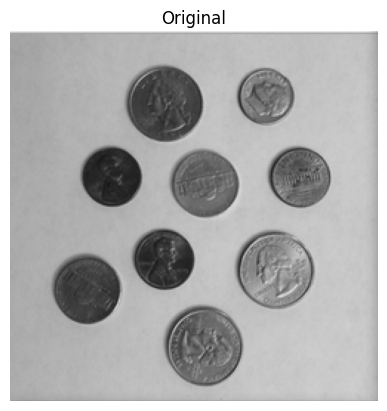

In [8]:
image_path = "../images/coins.png"
image = cv2.imread(image_path)
imrgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(imrgb)
plt.title('Original')
plt.axis('off')
plt.show()